## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/home/fodark/Documents/default.csv')

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## Logistic Regression with `scikit` function

In [4]:
X = np.array(df['balance'])
X_p = X.reshape(-1,1)
y = np.array(df['default'])

clf = LogisticRegression().fit(X_p,y)

In [5]:
b0_sk = clf.intercept_[0]
b1_sk = clf.coef_[0][0]

-10.651328236506075 0.0054989155471654085


In [6]:
x_fit = list(range(0,2800))
y_fit = [1 / (1 + np.exp(-(b0_sk + b1_sk*x_i))) for x_i in x_fit]

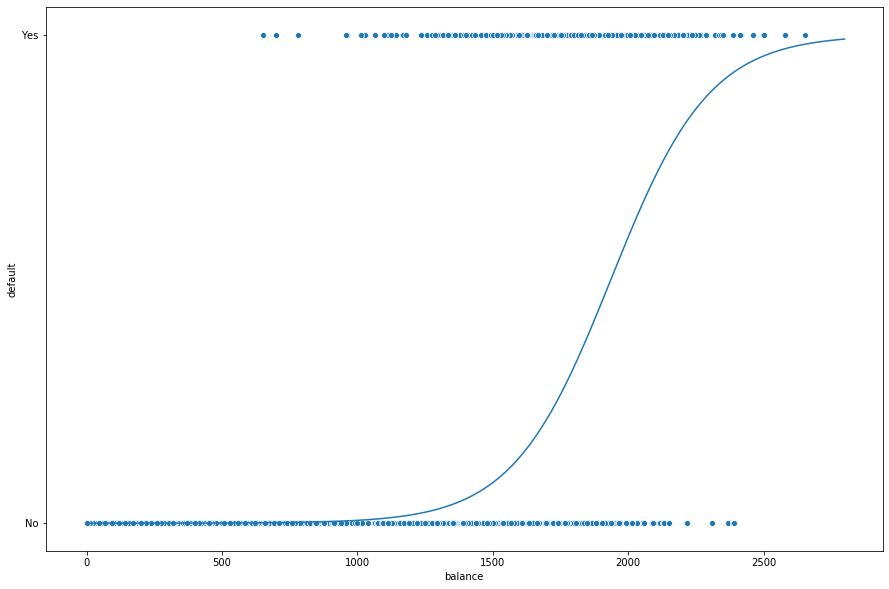

In [7]:
%matplotlib inline
figure(figsize=(15,10))

sns.lineplot(x_fit,y_fit)
sns.scatterplot(x='balance', y='default', data=df)

plt.show()

## Logistic regression by hand

### Gradient calculation

In [19]:
def gradient_step(b0, b1, lr0, lr1):
    b0_yes_grad = []
    b0_no_grad = []
    
    b1_yes_grad = []
    b1_no_grad = []

    df_train = pd.DataFrame()

    for _ in range(5):
        df1 = df.sample(frac=.01)
        df_train = df_train.append(df1)
    X = np.array(df_train['balance'])
    y = np.array(df_train['default'])
    
    for i, x_i in enumerate(X):
        tmp = np.exp(b0 + b1 * x_i)

        if y[i] == 'Yes':
            tmp_g1 = 1 / (1 + tmp)
            tmp_g2 = x_i / (1 + tmp)
            if np.isnan(tmp_g1) or np.isnan(tmp_g2) or np.isinf(tmp_g1) or np.isinf(tmp_g2):
                continue
            b0_yes_grad.append(tmp_g1)
            b1_yes_grad.append(tmp_g2)
        else:
            tmp_g3 = - tmp / (1 + tmp)
            tmp_g4 = - (x_i * tmp) / (1 + tmp)
            if np.isnan(tmp_g3) or np.isnan(tmp_g4) or np.isinf(tmp_g3) or np.isinf(tmp_g4):
                continue
            b0_no_grad.append(tmp_g3)
            b1_no_grad.append(tmp_g4)
    b0_grad = np.mean(b0_yes_grad) + np.mean(b0_no_grad)
    b1_grad = np.mean(b1_yes_grad) + np.mean(b1_no_grad)
    
    return (b0 + lr0 * b0_grad, b1 + lr1 * b1_grad)

### Training cycle

In [20]:
b0_hand = -7
b1_hand = .01
for i in range(10000):
    b0_hand, b1_hand = gradient_step(b0_start, b1_start, 1e-4, 1e-6)
    if np.isnan(b0_hand) or np.isnan(b1_hand):
        print('Something went wrong...')
        break

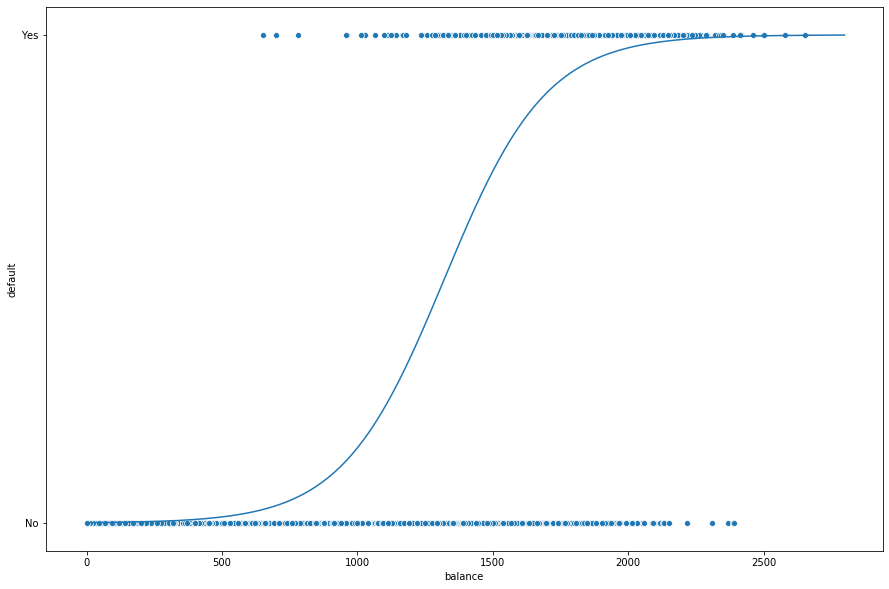

In [22]:
y_fit = [1 / (1 + np.exp(-(b0_hand + b1_hand * x_i))) for x_i in x_fit]

%matplotlib inline
figure(figsize=(15,10))

sns.lineplot(x_fit,y_fit)
sns.scatterplot(x='balance', y='default', data=df)

In [29]:
def like(b0, b1):
    like_value = 0.
    for i, x_i in enumerate(X):
        tmp = np.exp(- (b0 + b1 * x_i))
        if y_data[i] == 'Yes':
            like_value += np.log(1 / (1 + tmp))
        else:
            like_value += np.log(1 - (1 / (1 + tmp)))
    return like_value

In [30]:
X = np.array(df['balance'])
X_p = X.reshape(-1,1)
y_data = np.array(df['default'])

b0_fit = np.linspace(-15, -5, num=30)
b1_fit = np.linspace(0.001498, 0.01049, num=30)

fitted = np.zeros((len(b0_fit), len(b1_fit)))

for i, x in enumerate(b0_fit):
    for j, y in enumerate(b1_fit):
        fitted[i][j] = like(x,y)

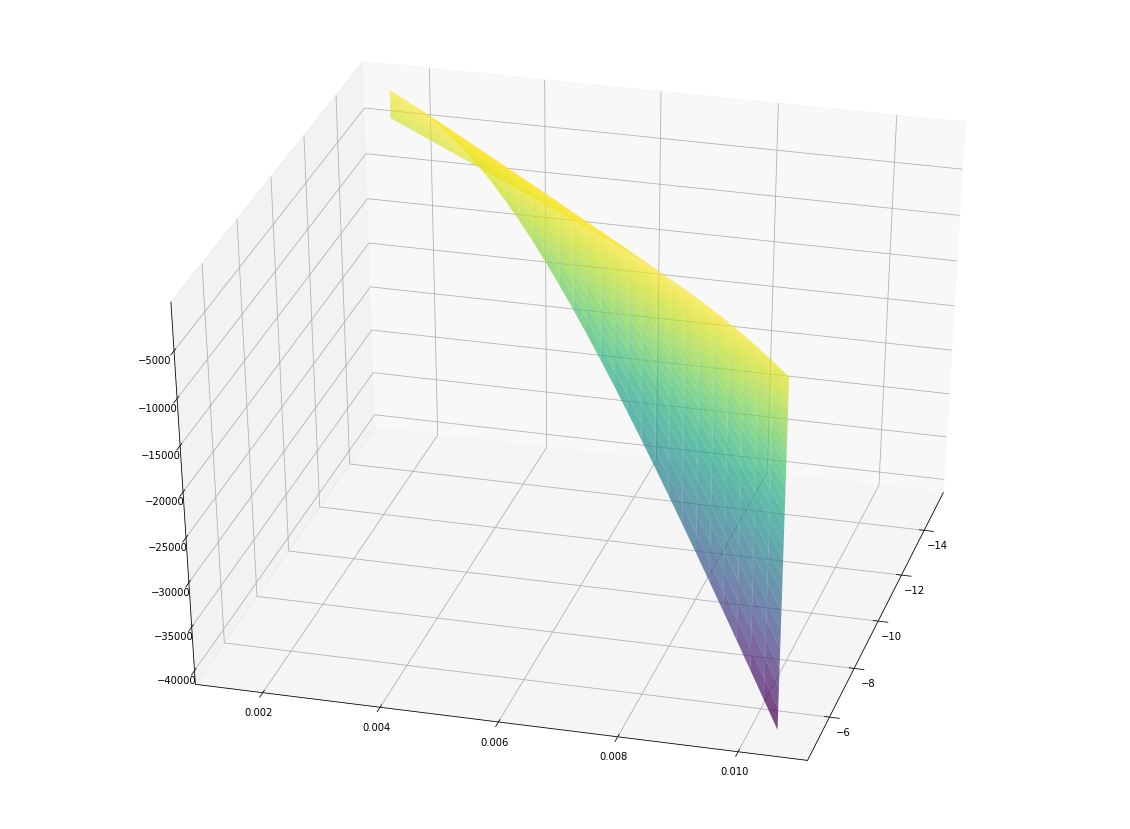

In [31]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax = plt.axes(projection='3d')
ax.view_init(35, 15)

ax.plot_surface(b0_fit, b1_fit, fitted, cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=.7)